# Best Model

# Imports

In [10]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split

# Load and Prepare Data

In [11]:
data = pd.read_csv('Data/Processed Data/target_encoded_data.csv')
X = data.drop('Class/ASD', axis=1)
y = data['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load Best Model

In [12]:
model_info = joblib.load('Models/best_model.joblib')
model = model_info['model']
print(f"Loaded model type: {type(model).__name__}")
print(f"Model parameters: {model.get_params()}")

Loaded model type: SVC
Model parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': {0: 1, 1: 1}, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## Train the Best Model

In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model Diagonostics

In [14]:
print("\nModel Training Diagnostics:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nPrediction Distribution:")
print(pd.Series(y_pred).value_counts())
print("\nActual Distribution:")
print(pd.Series(y_test).value_counts())


Model Training Diagnostics:
Training set shape: (640, 19)
Test set shape: (160, 19)

Prediction Distribution:
0    126
1     34
Name: count, dtype: int64

Actual Distribution:
Class/ASD
0    124
1     36
Name: count, dtype: int64


## Metrics


In [15]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("\nPerformance Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy:{acc:.4f} ")


Performance Metrics:
Precision: 0.7647
Recall: 0.7222
F1-Score: 0.7429
Accuracy:0.8875 


### Visualization 

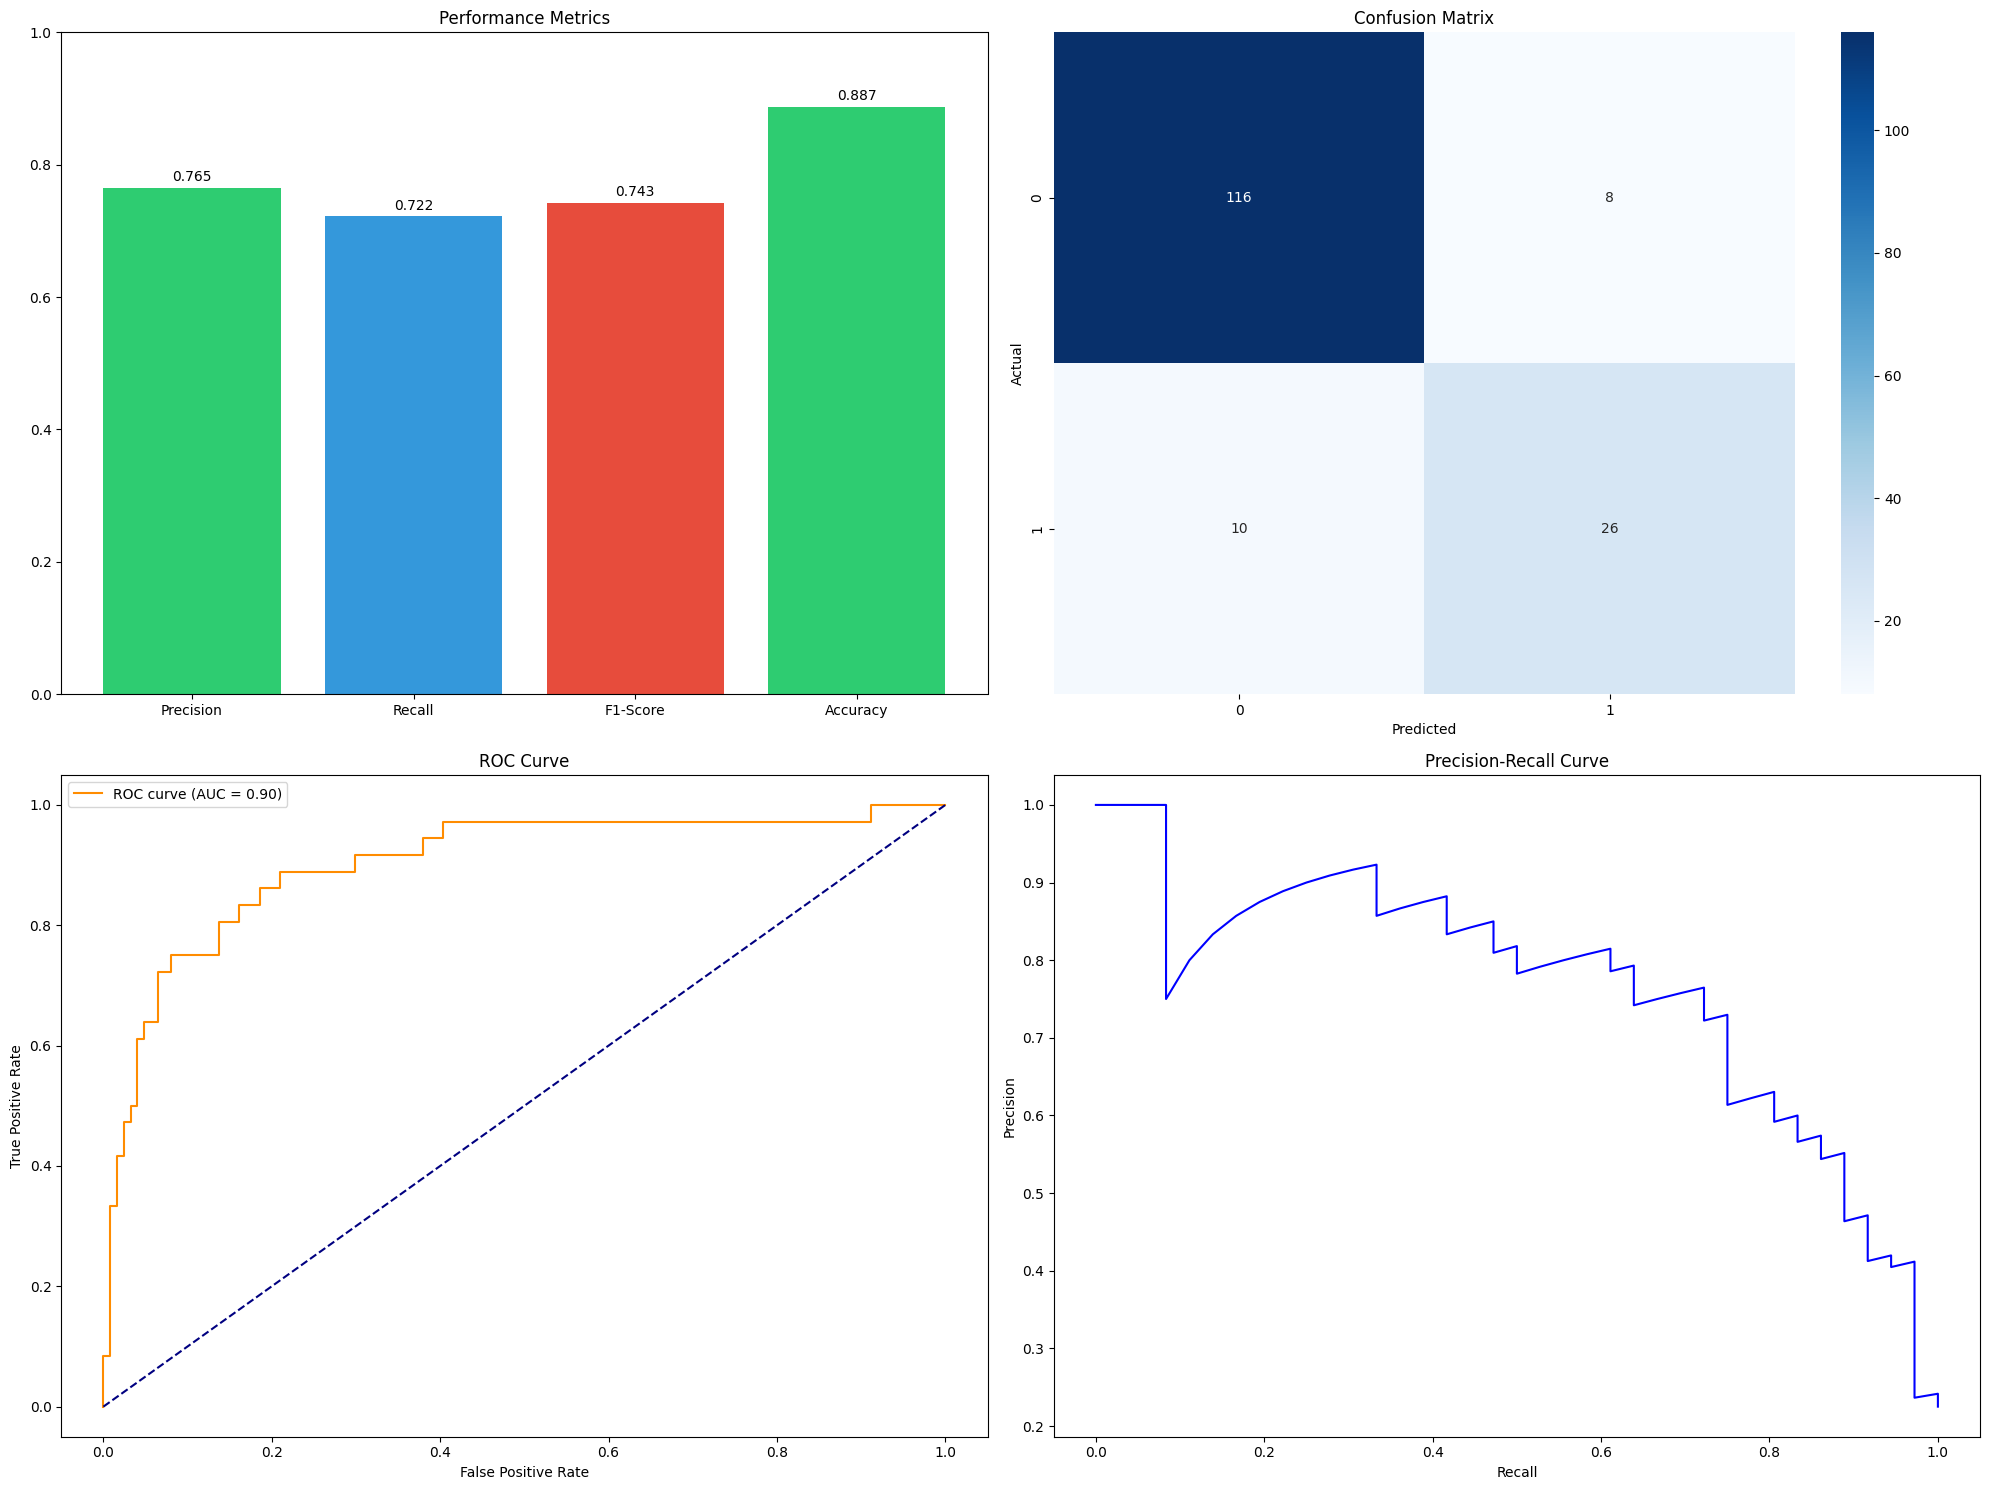

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
    
# Bar Plot
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
values = [precision, recall, f1,acc]
ax1.bar(metrics, values, color=['#2ecc71', '#3498db', '#e74c3c',])
ax1.set_title('Performance Metrics')
ax1.set_ylim(0, 1)
for i, v in enumerate(values):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')
    
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
    
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
ax3.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax3.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend()
    
# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
ax4.plot(recall_curve, precision_curve, color='blue')
ax4.set_xlabel('Recall')
ax4.set_ylabel('Precision')
ax4.set_title('Precision-Recall Curve')
    
plt.tight_layout()
plt.show()